In [1]:
import pandas as pd
import numpy as np
import pyfolio as pf
import empyrical as ep
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sharadar.pipeline.engine import load_sharadar_bundle, symbols

In [2]:
perf_dump_file = '../algo/backup/haugen_2020-12-28_0301_perf.dump'
perf = pd.read_pickle(perf_dump_file)

In [3]:
rets, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)

In [4]:
monthly_ret_table = ep.aggregate_returns(rets, 'monthly').unstack().round(3)

In [5]:
monthly_ret_table

,1,2,3,4,5,6,7,8,9,10,11,12
2001,NaN,0.000,-0.049,0.129,0.071,0.047,-0.141,-0.109,-0.168,0.066,0.095,0.160
2002,0.009,0.063,0.108,0.040,-0.026,-0.028,-0.178,0.111,-0.038,0.076,0.050,-0.070
2003,-0.071,-0.046,0.036,0.087,0.183,-0.007,0.108,0.091,-0.014,0.063,0.062,0.010
2004,0.038,-0.040,0.070,-0.079,0.016,0.024,-0.051,-0.086,0.157,-0.095,0.214,0.027
2005,-0.057,0.077,-0.083,-0.082,0.073,0.102,0.091,0.081,0.026,-0.094,0.064,0.016
2006,0.154,-0.064,0.090,-0.005,-0.160,-0.017,0.026,-0.002,-0.045,0.085,-0.009,-0.032
2007,0.063,0.109,-0.024,0.074,0.043,-0.021,-0.099,-0.024,0.093,0.139,-0.017,0.130
2008,-0.089,0.035,-0.035,0.140,0.104,0.109,-0.122,-0.047,-0.227,-0.153,-0.102,0.235
2009,-0.056,0.008,0.132,0.262,0.190,0.191,0.222,-0.009,0.065,-0.049,0.037,0.105
2010,0.018,0.061,0.155,0.047,-0.153,-0.123,0.058,-0.008,0.111,0.040,0.047,0.059


Text(0.5, 1.0, 'Monthly returns (%)')

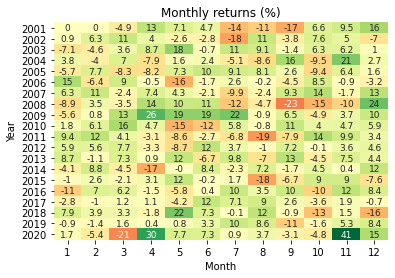

In [6]:
ax = plt.gca()
sns.heatmap(
    monthly_ret_table.fillna(0) *
    100.0,
    annot=True,
    annot_kws={"size": 9},
    alpha=1.0,
    center=0.0,
    cbar=False,
    cmap=matplotlib.cm.RdYlGn,
    ax=ax)
ax.set_ylabel('Year')
ax.set_xlabel('Month')
ax.set_title("Monthly returns (%)")

In [7]:
monthly_logr_table = np.log1p(monthly_ret_table).round(3)
monthly_logr_table

,1,2,3,4,5,6,7,8,9,10,11,12
2001,NaN,0.000,-0.050,0.121,0.069,0.046,-0.152,-0.115,-0.184,0.064,0.091,0.148
2002,0.009,0.061,0.103,0.039,-0.026,-0.028,-0.196,0.105,-0.039,0.073,0.049,-0.073
2003,-0.074,-0.047,0.035,0.083,0.168,-0.007,0.103,0.087,-0.014,0.061,0.060,0.010
2004,0.037,-0.041,0.068,-0.082,0.016,0.024,-0.052,-0.090,0.146,-0.100,0.194,0.027
2005,-0.059,0.074,-0.087,-0.086,0.070,0.097,0.087,0.078,0.026,-0.099,0.062,0.016
2006,0.143,-0.066,0.086,-0.005,-0.174,-0.017,0.026,-0.002,-0.046,0.082,-0.009,-0.033
2007,0.061,0.103,-0.024,0.071,0.042,-0.021,-0.104,-0.024,0.089,0.130,-0.017,0.122
2008,-0.093,0.034,-0.036,0.131,0.099,0.103,-0.130,-0.048,-0.257,-0.166,-0.108,0.211
2009,-0.058,0.008,0.124,0.233,0.174,0.175,0.200,-0.009,0.063,-0.050,0.036,0.100
2010,0.018,0.059,0.144,0.046,-0.166,-0.131,0.056,-0.008,0.105,0.039,0.046,0.057


Text(0.5, 1.0, 'Monthly log returns (%)')

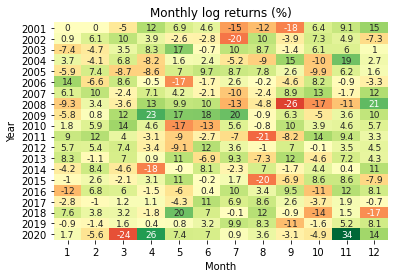

In [8]:
ax = plt.gca()
sns.heatmap(
    monthly_logr_table.fillna(0) *
    100.0,
    annot=True,
    annot_kws={"size": 9},
    alpha=1.0,
    center=0.0,
    cbar=False,
    cmap=matplotlib.cm.RdYlGn,
    ax=ax)
ax.set_ylabel('Year')
ax.set_xlabel('Month')
ax.set_title("Monthly log returns (%)")

In [9]:
monthly_logr_table.mean()

1     0.005105
2     0.024100
3     0.018100
4     0.029550
5     0.024450
6     0.031450
7     0.008350
8    -0.004550
9    -0.006000
10   -0.005150
11    0.062150
12    0.043250
dtype: float64

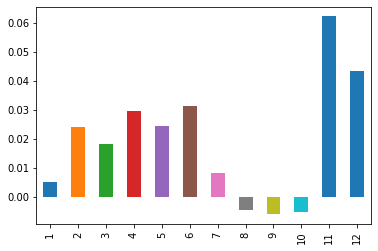

In [10]:
monthly_logr_table.mean().plot.bar()

/home/c.cerbo/zipline/lib/python3.6/site-packages/pandas-0.22.0-py3.6-linux-x86_64.egg/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/c.cerbo/zipline/lib/python3.6/site-packages/pandas-0.22.0-py3.6-linux-x86_64.egg/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/c.cerbo/zipline/lib/python3.6/site-packages/pandas-0.22.0-py3.6-linux-x86_64.egg/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42838220b8>,
      dtype=object)

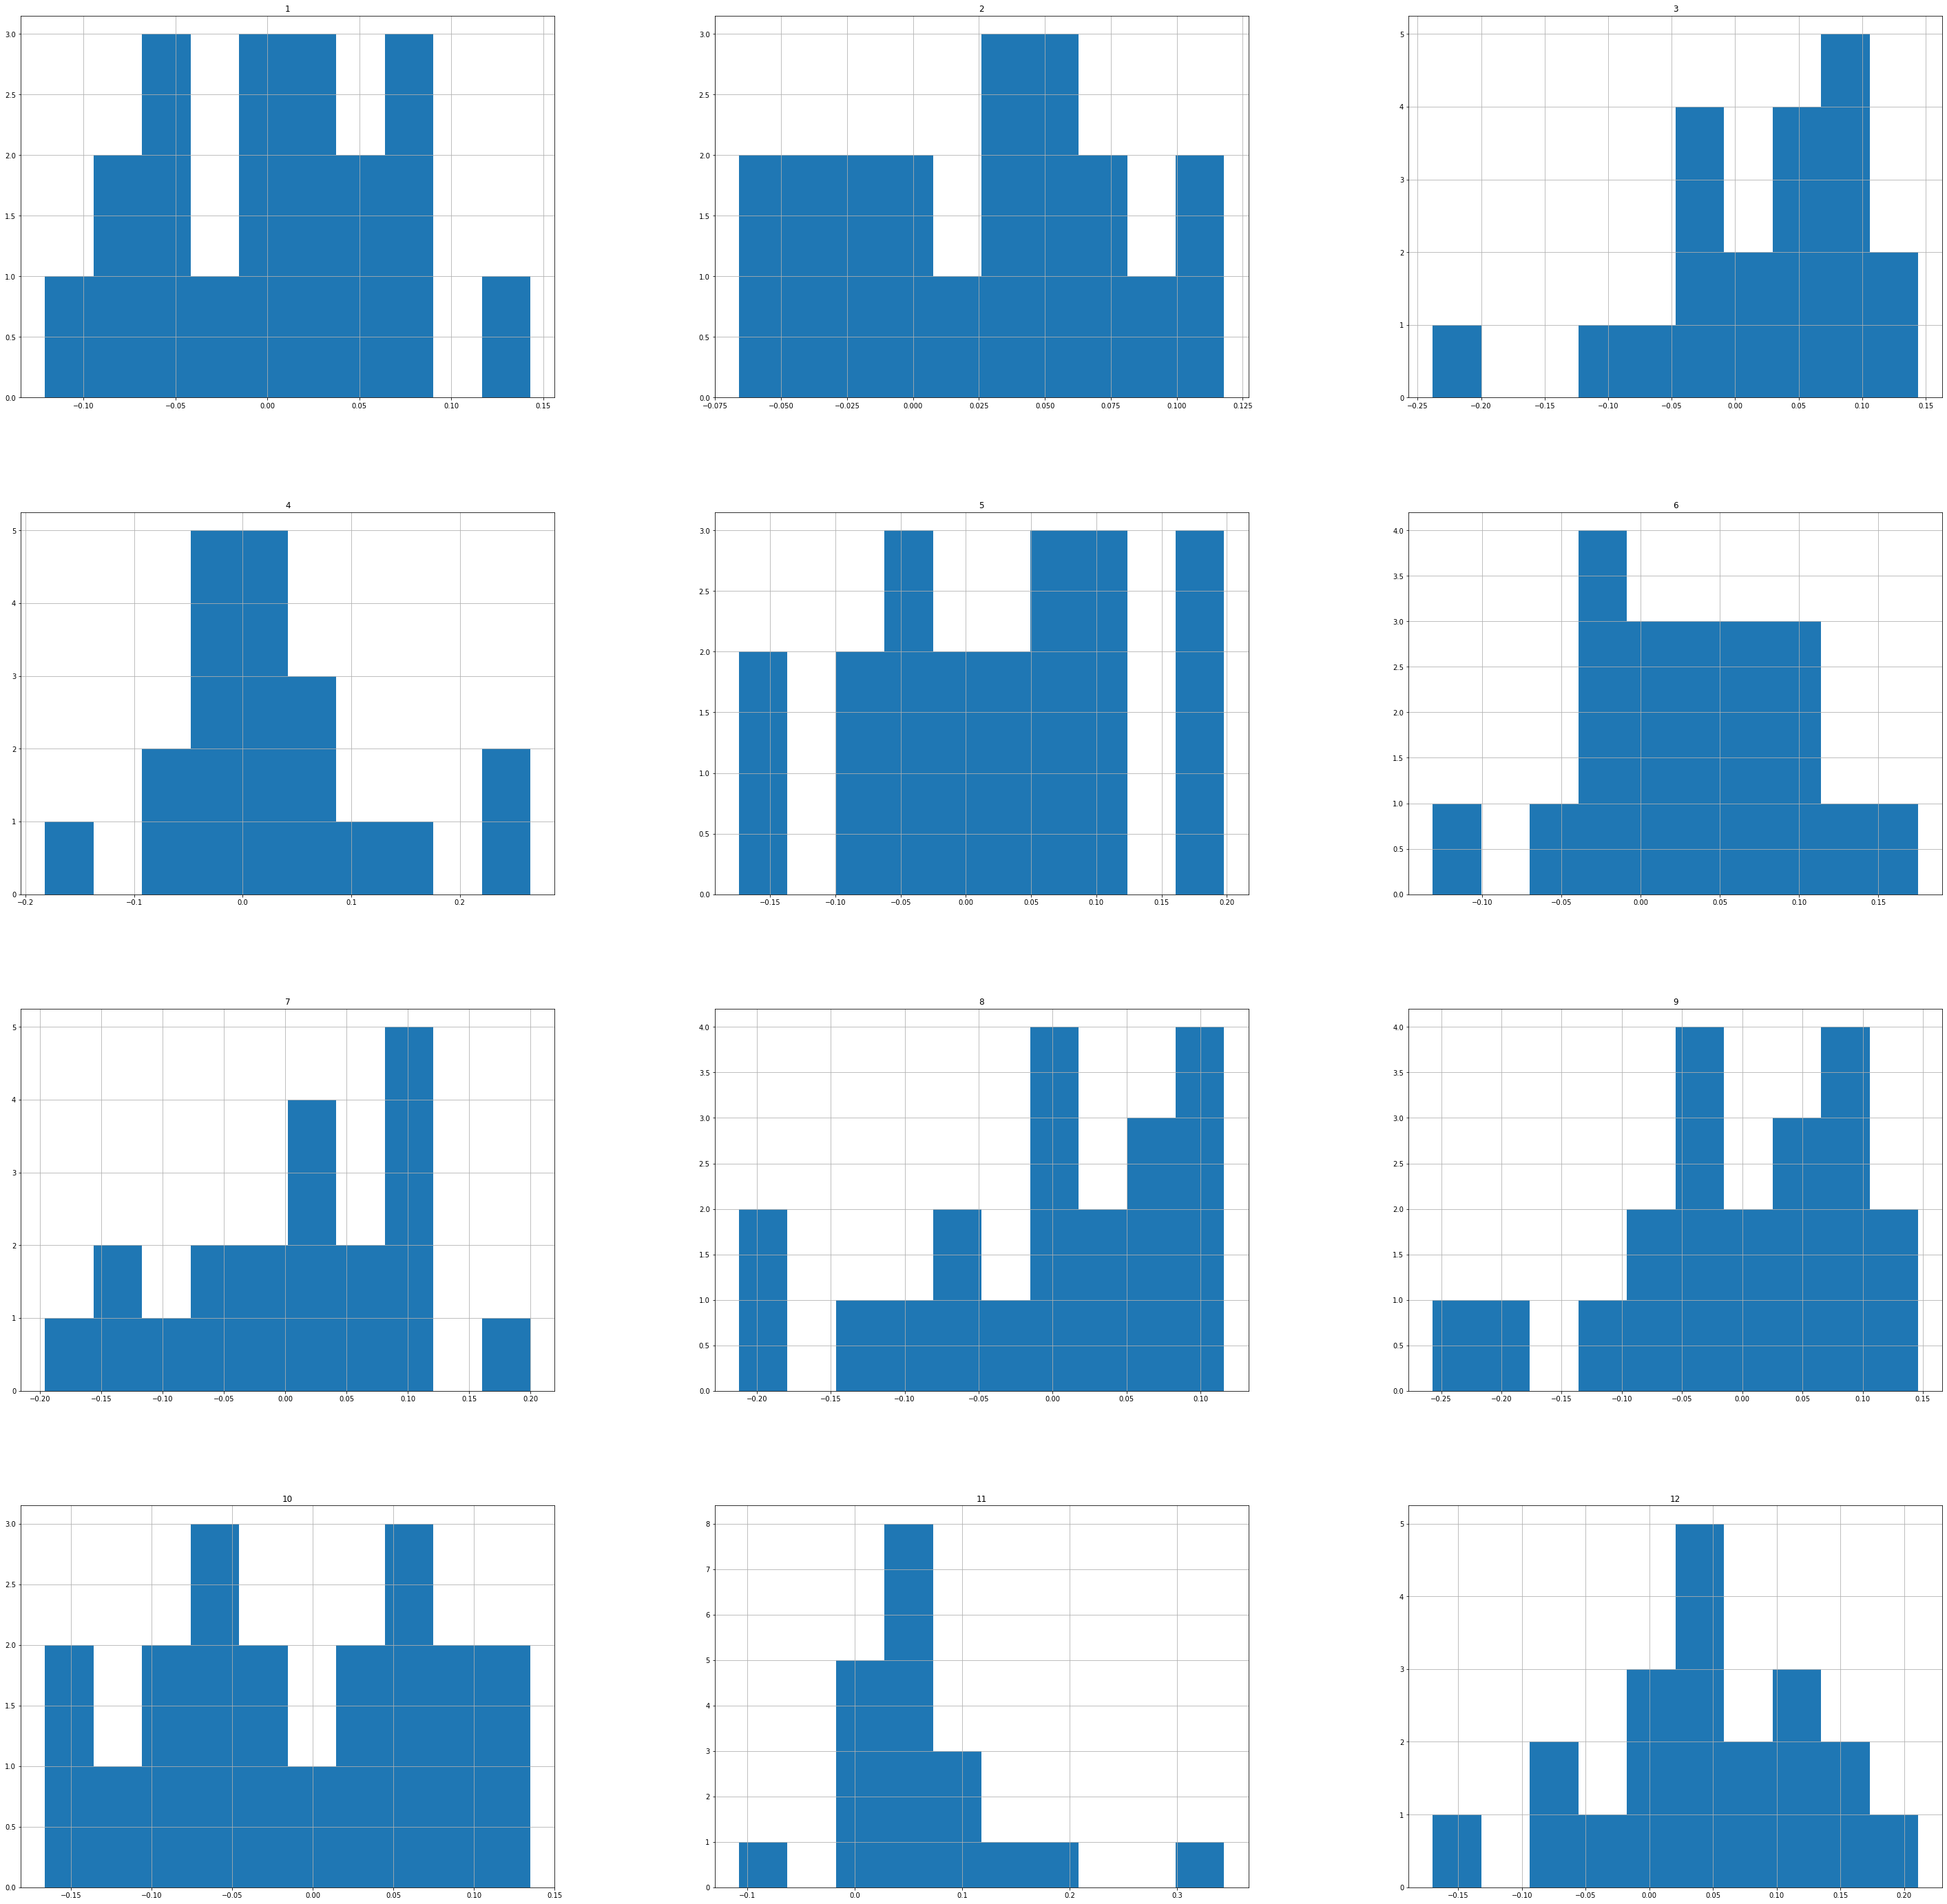

In [11]:
monthly_logr_table.hist(figsize=(50,50))

In [12]:
positions = pf.utils.check_intraday('infer', rets, positions, transactions)

transactions_closed = pf.round_trips.add_closing_transactions(positions,
                                                           transactions)
# extract_round_trips requires BoD portfolio_value
trades = pf.round_trips.extract_round_trips(
    transactions_closed,
    portfolio_value=positions.sum(axis='columns') / (1 + rets)
)

In [13]:
total_pnl = trades['pnl'].sum()
pnl_attribution = trades.groupby('symbol')['pnl'].sum() / total_pnl
pnl_attribution.name = ''

pnl_attribution.index = pnl_attribution.index.map(pf.utils.format_asset)
pf.utils.print_table(
    pnl_attribution.sort_values(
        inplace=False,
        ascending=False,
    ),
    name='Profitability (PnL / PnL total) per name',
    float_format='{:.2%}'.format,
)

Profitability (PnL / PnL total) per name,
symbol,
ENPH,13.79%
TNDM,11.49%
GRPN,7.99%
NOVA,4.22%
CSTL,3.83%
APPS,3.57%
CDLX,3.46%
AMD,3.38%
TTD,3.36%


In [14]:
pnl_attribution.shape

(1002,)

In [15]:
#returns = pnl / portfolio_value
#'rt_returns': pnl / invested,
#returns in respect to the portfolio value while 
#rt_returns are the returns in regards to the invested capital
trades.head()

,close_dt,long,open_dt,pnl,rt_returns,symbol,duration,returns
0,2005-10-04 20:00:00+00:00,True,2005-09-02 20:00:00+00:00,-6.149520e+04,-0.246407,Equity(110184 [TMG]),32 days 00:00:00,-0.023980
1,2020-12-24 00:00:01+00:00,True,2020-12-02 21:00:00+00:00,-1.299366e+05,-0.014726,Equity(110418 [RAPT]),21 days 03:00:01,-0.001271
2,2020-12-02 21:00:00+00:00,True,2020-10-02 20:00:00+00:00,2.912289e+05,0.351768,Equity(110628 [NOVA]),61 days 01:00:00,0.003398
3,2020-12-24 00:00:01+00:00,True,2020-10-02 20:00:00+00:00,3.687529e+06,0.604488,Equity(110628 [NOVA]),82 days 04:00:01,0.036083
4,2020-12-24 00:00:01+00:00,True,2020-12-02 21:00:00+00:00,3.616304e+06,0.417694,Equity(110637 [CSTL]),21 days 03:00:01,0.035386


In [16]:
bundle = load_sharadar_bundle()

In [17]:
assets = [x.sid for x in trades['symbol']]
len(assets)

1998

In [18]:
sectors = bundle.asset_finder.get_info(assets, 'sector')

In [19]:
trades['sector'] = sectors.T

In [20]:
trades['log_returns'] = np.log1p(trades['returns'])

In [21]:
sector_rets = trades[['sector','log_returns']].groupby(['sector']).mean().sort_values(by='log_returns', ascending=False)

In [22]:
sector_rets

,log_returns
sector,
Communication Services,0.007069
Healthcare,0.004050
Technology,0.003727
Consumer Cyclical,0.001958
Industrials,0.001502
Basic Materials,0.001411
Consumer Defensive,0.001064
Energy,-0.000198
Utilities,-0.000290


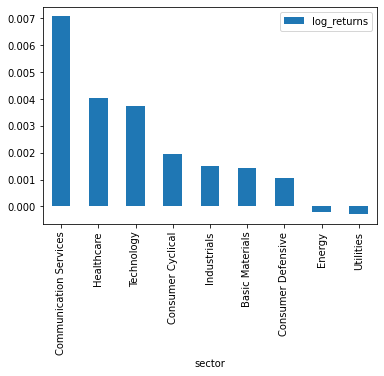

In [23]:
sector_rets.plot.bar()

In [24]:
trades.iloc[:,5].head()

0     Equity(110184 [TMG])
1    Equity(110418 [RAPT])
2    Equity(110628 [NOVA])
3    Equity(110628 [NOVA])
4    Equity(110637 [CSTL])
Name: symbol, dtype: object

In [25]:
df = pd.DataFrame({'score' : [1,1.5,1.8,2,2.5,3,3.6,3.7,3.8,4,4.9,5,6,6.7,6.8,7,7.8,10],
                'sector'  : ["first","second","second","first",
                            "second","first","third","fourth",
                            "fifth","second","fifth","first",
                            "first","second","third","fourth","fifth", "xyz"]})
df

,score,sector
0,1.0,first
1,1.5,second
2,1.8,second
3,2.0,first
4,2.5,second
5,3.0,first
6,3.6,third
7,3.7,fourth
8,3.8,fifth
9,4.0,second


In [26]:
df=df.sort_values(by=['sector','score'], ascending=False)
df

,score,sector
17,10.0,xyz
14,6.8,third
6,3.6,third
13,6.7,second
9,4.0,second
4,2.5,second
2,1.8,second
1,1.5,second
15,7.0,fourth
7,3.7,fourth


In [27]:
df.groupby('sector').head(2).sort_values(by='sector')

,score,sector
16,7.8,fifth
10,4.9,fifth
12,6.0,first
11,5.0,first
15,7.0,fourth
7,3.7,fourth
13,6.7,second
9,4.0,second
14,6.8,third
6,3.6,third


In [28]:
df.shape

(18, 2)

In [29]:
len(df)

18